# Demographic Research with the Facebook Marketing API

# Outline

1. Install pySocialWatcher
2. Import modules
3. Register for Facebook Marketing API access
4. Explore pySocialWatcher module
5. Use pySocialWatcher to get data on new movers


* import relevant modules
* standard library modules:
    * [os](https://docs.python.org/3/library/os.html)
    * [csv](https://docs.python.org/3/library/csv.html)
    * [urllib](https://docs.python.org/3/library/urllib.html)
    * [webbrowser](https://docs.python.org/3/library/webbrowser.html)
* open source modules:
    * [numpy](http://www.numpy.org/)
    * [pandas](http://pandas.pydata.org)
    * [matplotlib](http://matplotlib.org/)
    * [altair](https://github.com/altair-viz/altair)
    * [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

* include translations of python code
    * e.g. import is equivalent to library in R
    * can also alias module names by using "as"
        * e.g. import numpy as np means that instead of using numpy.FUNCTION you can use np.FUNCTION
    * functions are called by using the period (.) after the name of a module
        * e.g. matplotlib.pyplot is a function within the matplotlib library

## Install pySocialWatcher
* go to https://github.com/maraujo/pySocialWatcher and follow instructions  
alternative for OSX users:
* copy "download_pySocialWatcher.sh" from the install_software folder to the location you want to install pySocialWatcher
    * type "sh download_pySocialWatcher.sh" to install pySocial Watcher
* tutorial on pySocialWatcher module: 
    * https://github.com/maraujo/pySocialWatcher
https://goo.gl/WzE9ic

In [1]:
import os 
import re
import sys
import csv
import json 
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import OrderedDict
from pysocialwatcher import watcherAPI 
from utils import * 

In [2]:
os.getcwd()

'/Users/kivan/repos/paa_2017_social_media/Estimate_Facebook_Audience/notebooks'

## Register for Facebook Marketing API access: 
* Go to https://developers.facebook.com/apps/
* Click "Get Started" in the top right
* Create a new app by clicking on "+ Add a New App" and follow the process minimally 
* In the app's dashboard page, click "+ Add product" in the toolbar on the left
* Select "Marketing" Product Setup
* Click "Get Access Token"
* Click "Extend Access Token" button (at the bottom) (the button may not show up right away, just refresh the page)
    * The access token that shows up under the form is the one you want! It will look something like this:
    EAAHMonBrQ5kBALhYvCnLRsNRyO9YJH8I6ZBKwby5cLrS4V2GZAC2GT2MbDHXjpwnfvkPB0ZBv7knZAP1wRzKQVZAxd7fAsQTDAVrE0H3hUffFZBuRlncX0cAMVj8sIKLN68U6BxDAogvIdluX8tAMK

* Finally, you want to get your application ID.
* Go to https://www.facebook.com/business/ and click "Create Advert"
* In URL, copy the part starting with act= such as:
https://www.facebook.com/ads/manager/creation/creation/?act=952863473440&pid=p1
### Create facebook_credentials.csv
* change directory to the credentials folder
    * create a .csv file named "facebook_credentials.csv"
    * paste your Facebook Access Token in the first row, first column
    * paste your Ads Manager Account ID in the first row, second column

### Load Facebook credentials

In [3]:
watcher = watcherAPI() 
watcher.load_credentials_file("../credentials/facebook_credentials.csv")
watcher.check_tokens_account_valid()

2017-04-23 18:23:40 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Testing tokens and account number
2017-04-23 18:23:40 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO 	Sending in request: {"genders": [0], "geo_locations": {"regions": [{"key": "3843"}], "location_types": ["home"]}}
2017-04-23 18:23:40 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85697] INFO Starting new HTTPS connection (1): graph.facebook.com
2017-04-23 18:23:40 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO All tokens and respective account number are valid.


### Explore pySocialWatcher module
- Demographic and event targeting parameters:
    * https://developers.facebook.com/docs/marketing-api/targeting-specs/v2.9
- search for Facebook key of cities by name
    * e.g. search for cities that have "new" in their name

In [4]:
watcherAPI.print_geo_locations_given_query_and_location_type("new", ["city"])

2017-04-23 18:23:40 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85697] INFO Starting new HTTPS connection (1): graph.facebook.com


+----+---------+-----------------+-----------------+-------------------+--------+
|    |     key | name            |   supports_city |   supports_region | type   |
|----+---------+-----------------+-----------------+-------------------+--------|
|  0 |  295144 | New Westminster |               1 |                 1 | city   |
|  1 | 2425052 | New London      |               1 |                 1 | city   |
|  2 | 2468572 | New Buffalo     |               1 |                 1 | city   |
|  3 | 2501041 | Newark          |               1 |                 1 | city   |
|  4 | 2429126 | New York        |               1 |                 1 | city   |
|  5 | 2443130 | New Albany      |               1 |                 1 | city   |
|  6 | 2465868 | New Bedford     |               1 |                 1 | city   |
|  7 | 2490260 | New City        |               1 |                 1 | city   |
|  8 | 1037239 | New Delhi       |               1 |                 1 | city   |
|  9 | 2425051 |

### available "behaviors" to segment demographic groups

In [5]:
watcher.print_behaviors_list()

2017-04-23 18:23:48 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85697] INFO Starting new HTTPS connection (1): graph.facebook.com


+-----+------------+---------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------------------------------------------------------+
|     |   audience |   behavior_id | description                                                                                                                                                                                                                                                | name                                               | path                                                                                               |
|-----+------------+---------------+----------------------------------------------------------------------------

In [6]:
watcher.print_bad_joke()

I used to think the brain was the most important organ.
Then I thought, look what’s telling me that.


In [7]:
US_states = pd.read_table("../data/US_states.csv", sep = ",", header=0)
US_states.head(15)

,Abbreviation,State Name,FB_key
0,AL,Alabama,3843
1,AK,Alaska,3844
2,AZ,Arizona,3845
3,AR,Arkansas,3846
4,CA,California,3847
5,CO,Colorado,3848
6,CT,Connecticut,3849
7,DE,Delaware,3850
8,FL,Florida,3852
9,GA,Georgia,3853


In [8]:
illinois_dic={"name": "small_biz",  "geo_locations": [{"name": "city",
                                                           "values": [{"key":str(2438177)}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2], "behavior":[{"or": 6002714898572 ,"name": "small_business_owners"}]}
illinois_dic

{'behavior': [{'name': 'small_business_owners', 'or': 6002714898572}],
 'genders': [0, 1, 2],
 'geo_locations': [{'location_types': ['home'],
   'name': 'city',
   'values': [{'key': '2438177'}]}],
 'name': 'small_biz'}

### View an entire row in a dataframe

In [9]:
US_states.iloc[12]

Abbreviation          IL
State Name      Illinois
FB_key              3856
Name: 12, dtype: object

### Making API request with pySocialWatcher
- watcher class has a `run_data_collection` function
- `run_data_collection` takes a .json file as an input and creates an API request
- output from `run_data_collection` is a pandas dataframe and .csv files

In [10]:
illinois_dic={"name": "IL_example",  "geo_locations": [{"name": "regions",
                                                           "values": [{"key":str(US_states["FB_key"][12])}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2],
          "ages_ranges": [{"min":13, "max":65}]}
illinois_dic

{'ages_ranges': [{'max': 65, 'min': 13}],
 'genders': [0, 1, 2],
 'geo_locations': [{'location_types': ['home'],
   'name': 'regions',
   'values': [{'key': '3856'}]}],
 'name': 'IL_example'}

In [11]:
illinois_dic_ordered = OrderedDict(sorted(illinois_dic.items(),key=lambda t: len(t[0])))
illinois_dic_json=json.dumps(illinois_dic_ordered, indent = 4)
print illinois_dic_json

gender_dict = {'0':'female_male_total_pop'}
gender = map(gender_dict.get, str(illinois_dic["genders"][0]))[0]
file_name = "IL_example.json"

with open('../data/%s' % file_name, 'w') as outfile:
    outfile.write(json.dumps(illinois_dic_ordered, indent = 4))

{
    "name": "IL_example", 
    "genders": [
        0, 
        1, 
        2
    ], 
    "ages_ranges": [
        {
            "max": 65, 
            "min": 13
        }
    ], 
    "geo_locations": [
        {
            "values": [
                {
                    "key": "3856"
                }
            ], 
            "name": "regions", 
            "location_types": [
                "home"
            ]
        }
    ]
}


In [12]:
watcher.run_data_collection("../data/%s" % file_name)

2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Building Collection Dataframe
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: interests
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: behavior
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: scholarities
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: languages
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: family_statuses
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Total API Requests:3
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Completed: 0.00
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING No field: languages
2017-04-23 18:23:50 D-108-179-131-17.dhcp4.washingto

,name,ages_ranges,geo_locations,genders,interests,behavior,scholarities,languages,family_statuses,all_fields,targeting,response,audience
0,IL_example,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",0.0,NaN,NaN,NaN,NaN,NaN,"((genders, 0), (ages_ranges, {u'max': 65, u'mi...","{u'flexible_spec': [], u'geo_locations': {u're...","{""data"":{""users"":9000000,""bid_estimations"":[{""...",9000000
1,IL_example,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",1.0,NaN,NaN,NaN,NaN,NaN,"((genders, 1), (ages_ranges, {u'max': 65, u'mi...","{u'flexible_spec': [], u'geo_locations': {u're...","{""data"":{""users"":4200000,""bid_estimations"":[{""...",4200000
2,IL_example,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",2.0,NaN,NaN,NaN,NaN,NaN,"((genders, 2), (ages_ranges, {u'max': 65, u'mi...","{u'flexible_spec': [], u'geo_locations': {u're...","{""data"":{""users"":4800000,""bid_estimations"":[{""...",4800000


## Use pySocialWatcher to get data on new movers
### Analyze a specific behavior
6029662272682 | This Life Event segment contains consumers who are likely to be new movers in the last 6 months.| New mover    


In [13]:
illinois_dic_new_movers={"name": "IL_example",  "geo_locations": [{"name": "regions",
                                                           "values": [{"key":str(US_states["FB_key"][12])}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2],
          "ages_ranges": [{"min":13, "max":65}],
          "behavior":[{"or": [6029662272682],"name": "new_mover"}]}
illinois_dic_new_movers

{'ages_ranges': [{'max': 65, 'min': 13}],
 'behavior': [{'name': 'new_mover', 'or': [6029662272682]}],
 'genders': [0, 1, 2],
 'geo_locations': [{'location_types': ['home'],
   'name': 'regions',
   'values': [{'key': '3856'}]}],
 'name': 'IL_example'}

In [14]:
illinois_dic_new_movers_ordered = OrderedDict(sorted(illinois_dic_new_movers.items(),key=lambda t: len(t[0])))
illinois_dic_new_movers_json=json.dumps(illinois_dic_new_movers_ordered, indent = 4)
print illinois_dic_new_movers_json

gender_dict = {'0':'female_male_total_pop'}
gender = map(gender_dict.get, str(illinois_dic_new_movers_ordered["genders"][0]))[0]
file_name = "IL_example_new_movers.json"

with open('../data/%s' % file_name, 'w') as outfile:
    outfile.write(json.dumps(illinois_dic_new_movers_ordered, indent = 4))

{
    "name": "IL_example", 
    "genders": [
        0, 
        1, 
        2
    ], 
    "behavior": [
        {
            "or": [
                6029662272682
            ], 
            "name": "new_mover"
        }
    ], 
    "ages_ranges": [
        {
            "max": 65, 
            "min": 13
        }
    ], 
    "geo_locations": [
        {
            "values": [
                {
                    "key": "3856"
                }
            ], 
            "name": "regions", 
            "location_types": [
                "home"
            ]
        }
    ]
}


In [15]:
watcher.run_data_collection("../data/%s" % file_name)

2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Building Collection Dataframe
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: interests
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: scholarities
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: languages
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: family_statuses
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Total API Requests:3
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Completed: 0.00
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING No field: languages
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Completed: 33.33
2017-04-23 18:24:14 D-108-179-131-17.dhcp4.washington.edu root[85697]

,name,ages_ranges,geo_locations,genders,interests,behavior,scholarities,languages,family_statuses,all_fields,targeting,response,audience
0,IL_example,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",0.0,NaN,"{u'or': [6029662272682], u'name': u'new_mover'}",NaN,NaN,NaN,"((genders, 0), (ages_ranges, {u'max': 65, u'mi...",{u'flexible_spec': [{u'behaviors': [{'id': 602...,"{""data"":{""users"":220000,""bid_estimations"":[{""u...",220000
1,IL_example,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",1.0,NaN,"{u'or': [6029662272682], u'name': u'new_mover'}",NaN,NaN,NaN,"((genders, 1), (ages_ranges, {u'max': 65, u'mi...",{u'flexible_spec': [{u'behaviors': [{'id': 602...,"{""data"":{""users"":97000,""bid_estimations"":[{""un...",97000
2,IL_example,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",2.0,NaN,"{u'or': [6029662272682], u'name': u'new_mover'}",NaN,NaN,NaN,"((genders, 2), (ages_ranges, {u'max': 65, u'mi...",{u'flexible_spec': [{u'behaviors': [{'id': 602...,"{""data"":{""users"":120000,""bid_estimations"":[{""u...",120000


In [16]:
state_subset = US_states.loc[US_states['Abbreviation'].isin(["CA","NY", "TX", "IL"])]
state_subset.index = [0,1,2,3]
state_subset

,Abbreviation,State Name,FB_key
0,CA,California,3847
1,IL,Illinois,3856
2,NY,New York,3875
3,TX,Texas,3886


In [17]:
for state in range(0, len(state_subset["State Name"])):
    if not os.path.exists('../data/new_movers_by_state/%s' % state_subset["State Name"][state]):
        os.makedirs('../data/new_movers_by_state/%s' % state_subset["State Name"][state])

In [18]:
UN_age_min = [13,15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
UN_age_max = [65,19, 24, 29, 34, 39, 44, 49, 54, 59, 65]
UN_age_table = {'age_min': UN_age_min, 'age_max': UN_age_max}
UN_age_table_df = pd.DataFrame(data=UN_age_table, index=None)
UN_age_table_df = UN_age_table_df[["age_min", "age_max"]]
UN_age_table_df.to_csv("../data/UN_age_table.csv", index=None)

In [19]:
ctr = 0
for state in range(0, len(state_subset["State Name"])):
    state_dic={"name": str(state_subset["State Name"][state])+"_new_movers",
               "geo_locations": [{"name": "regions", "values": [{"key":str(US_states["FB_key"][state])}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2],
          "ages_ranges": [{"min":13, "max":65}],
          "behavior":[{"or": [6029662272682],"name": "new_movers"}]}
    state_dic["geo_locations"][0]["values"][0]['key'] = str(state_subset["FB_key"][state])
    state_dic_ordered = OrderedDict(sorted(state_dic.items(),key=lambda t: len(t[0])))
    state_dic_json=json.dumps(state_dic_ordered, indent = 4)
    gender_dict = {'0':'female_male_total_pop'}
    file_name = str(state_subset["State Name"][state])+"_new_movers"+".json"
    state_folder = state_subset["State Name"][state]

    if not os.path.exists('../data/new_movers_by_state/%s/api_requests_json' % state_folder):
        os.makedirs('../data/new_movers_by_state/%s/api_requests_json' % state_folder)

    if not os.path.exists('../data/new_movers_by_state/%s/api_requests_csv' % state_folder):
        os.makedirs('../data/new_movers_by_state/%s/api_requests_csv' % state_folder)


    with open('../data/new_movers_by_state/%s/api_requests_json/%s' % (state_folder,file_name), 'w') as outfile:
        outfile.write(json.dumps(state_dic_ordered, indent = 4))

    state_api_request = watcher.run_data_collection('../data/new_movers_by_state/%s/api_requests_json/%s' % (state_folder,file_name))
    state_api_request
    state_api_request.insert(0, "state",state_subset["State Name"][state])
    csv_filename = file_name.split(".")[0]+".csv"
    state_api_request.to_csv("../data/new_movers_by_state/%s/api_requests_csv/%s" % (state_folder,csv_filename),
                        index=False) 

    ctr = ctr +1
    total =len(state_subset["State Name"])
    print("file %.f of %.f " % (ctr,total))
    print(file_name)



2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Building Collection Dataframe
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: interests
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: scholarities
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: languages
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING Field not expecified: family_statuses
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Total API Requests:3
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Completed: 0.00
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] WARNING No field: languages
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Completed: 33.33
2017-04-23 18:24:39 D-108-179-131-17.dhcp4.washington.edu root[85697]

file 1 of 4 
California_new_movers.json


2017-04-23 18:25:12 D-108-179-131-17.dhcp4.washington.edu root[85798] INFO 	Sending in request: {"flexible_spec": [{"behaviors": [{"id": 6029662272682}]}], "geo_locations": {"regions": [{"key": "3856"}], "location_types": ["home"]}, "age_min": 13, "genders": [0], "age_max": 65, "exclusions": {}}
2017-04-23 18:25:12 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85798] INFO Starting new HTTPS connection (1): graph.facebook.com
2017-04-23 18:25:12 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Collecting... Completed: 33.33% , 1/3
2017-04-23 18:25:20 D-108-179-131-17.dhcp4.washington.edu root[85800] INFO 	Sending in request: {"flexible_spec": [{"behaviors": [{"id": 6029662272682}]}], "geo_locations": {"regions": [{"key": "3856"}], "location_types": ["home"]}, "age_min": 13, "genders": [1], "age_max": 65, "exclusions": {}}
2017-04-23 18:25:20 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85800] INFO Starting new HTTP

file 2 of 4 
Illinois_new_movers.json


2017-04-23 18:25:37 D-108-179-131-17.dhcp4.washington.edu root[85804] INFO 	Sending in request: {"flexible_spec": [{"behaviors": [{"id": 6029662272682}]}], "geo_locations": {"regions": [{"key": "3875"}], "location_types": ["home"]}, "age_min": 13, "genders": [0], "age_max": 65, "exclusions": {}}
2017-04-23 18:25:37 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85804] INFO Starting new HTTPS connection (1): graph.facebook.com
2017-04-23 18:25:38 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Collecting... Completed: 33.33% , 1/3
2017-04-23 18:25:46 D-108-179-131-17.dhcp4.washington.edu root[85806] INFO 	Sending in request: {"flexible_spec": [{"behaviors": [{"id": 6029662272682}]}], "geo_locations": {"regions": [{"key": "3875"}], "location_types": ["home"]}, "age_min": 13, "genders": [1], "age_max": 65, "exclusions": {}}
2017-04-23 18:25:46 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85806] INFO Starting new HTTP

file 3 of 4 
New York_new_movers.json


2017-04-23 18:26:02 D-108-179-131-17.dhcp4.washington.edu root[85810] INFO 	Sending in request: {"flexible_spec": [{"behaviors": [{"id": 6029662272682}]}], "geo_locations": {"regions": [{"key": "3886"}], "location_types": ["home"]}, "age_min": 13, "genders": [0], "age_max": 65, "exclusions": {}}
2017-04-23 18:26:02 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85810] INFO Starting new HTTPS connection (1): graph.facebook.com
2017-04-23 18:26:03 D-108-179-131-17.dhcp4.washington.edu root[85697] INFO Collecting... Completed: 33.33% , 1/3
2017-04-23 18:26:11 D-108-179-131-17.dhcp4.washington.edu root[85812] INFO 	Sending in request: {"flexible_spec": [{"behaviors": [{"id": 6029662272682}]}], "geo_locations": {"regions": [{"key": "3886"}], "location_types": ["home"]}, "age_min": 13, "genders": [1], "age_max": 65, "exclusions": {}}
2017-04-23 18:26:11 D-108-179-131-17.dhcp4.washington.edu requests.packages.urllib3.connectionpool[85812] INFO Starting new HTTP

file 4 of 4 
Texas_new_movers.json


In [20]:
%rm collect_finished_* dataframe_collecting_*  dataframe_skeleton_*

In [21]:
merge_subdirectories('../data/new_movers_by_state/',
                     'raw_new_movers_data.csv')

finished California folder at 2017-04-23 18:26:20
finished Illinois folder at 2017-04-23 18:26:20
finished New York folder at 2017-04-23 18:26:20
finished Texas folder at 2017-04-23 18:26:20
saved raw_new_movers_data.csv in /Users/kivan/repos/paa_2017_social_media/Estimate_Facebook_Audience/data


In [22]:
raw_new_movers_data = pd.read_csv("../data/raw_new_movers_data.csv")
raw_new_movers_data.head()

,state,name,ages_ranges,geo_locations,genders,interests,behavior,scholarities,languages,family_statuses,all_fields,targeting,response,audience
0,California,California_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3847'}], u'name': u're...",0.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 0), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":540000,""bid_estimations"":[{""u...",540000
1,California,California_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3847'}], u'name': u're...",1.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 1), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":240000,""bid_estimations"":[{""u...",240000
2,California,California_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3847'}], u'name': u're...",2.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 2), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":290000,""bid_estimations"":[{""u...",290000
3,Illinois,Illinois_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",0.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 0), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":220000,""bid_estimations"":[{""u...",220000
4,Illinois,Illinois_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",1.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 1), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":97000,""bid_estimations"":[{""un...",97000


In [23]:
print("the data has %s rows and %s columns" % (raw_new_movers_data.shape[0], raw_new_movers_data.shape[1]))
print(raw_new_movers_data.dtypes)

the data has 12 rows and 14 columns
state               object
name                object
ages_ranges         object
geo_locations       object
genders            float64
interests          float64
behavior            object
scholarities       float64
languages          float64
family_statuses    float64
all_fields          object
targeting           object
response            object
audience             int64
dtype: object


In [24]:
merged_new_movers_data = process_facebook_data(raw_new_movers_data)
merged_new_movers_data

utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["behavior"] = df.loc[:, ("behavior")].apply(lambda x: re.findall(r'\d+',x))
utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["behavior"] = df.loc[:, ("behavior")].apply(lambda x: ''.join(x))
utils.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,state,name,ages_ranges,genders,behavior,audience
0,California,California_new_movers,ages_13_65,total population,6029662272682,540000
1,California,California_new_movers,ages_13_65,female,6029662272682,240000
2,California,California_new_movers,ages_13_65,male,6029662272682,290000
3,Illinois,Illinois_new_movers,ages_13_65,total population,6029662272682,220000
4,Illinois,Illinois_new_movers,ages_13_65,female,6029662272682,97000
5,Illinois,Illinois_new_movers,ages_13_65,male,6029662272682,120000
6,New York,New York_new_movers,ages_13_65,total population,6029662272682,240000
7,New York,New York_new_movers,ages_13_65,female,6029662272682,100000
8,New York,New York_new_movers,ages_13_65,male,6029662272682,130000
9,Texas,Texas_new_movers,ages_13_65,total population,6029662272682,440000


In [25]:
merged_new_movers_data

,state,name,ages_ranges,genders,behavior,audience
0,California,California_new_movers,ages_13_65,total population,6029662272682,540000
1,California,California_new_movers,ages_13_65,female,6029662272682,240000
2,California,California_new_movers,ages_13_65,male,6029662272682,290000
3,Illinois,Illinois_new_movers,ages_13_65,total population,6029662272682,220000
4,Illinois,Illinois_new_movers,ages_13_65,female,6029662272682,97000
5,Illinois,Illinois_new_movers,ages_13_65,male,6029662272682,120000
6,New York,New York_new_movers,ages_13_65,total population,6029662272682,240000
7,New York,New York_new_movers,ages_13_65,female,6029662272682,100000
8,New York,New York_new_movers,ages_13_65,male,6029662272682,130000
9,Texas,Texas_new_movers,ages_13_65,total population,6029662272682,440000


In [26]:
merged_new_movers_data_genders = merged_new_movers_data.groupby("genders")
merged_new_movers_data_genders["audience"].sum()

genders
female               627000
male                 780000
total population    1440000
Name: audience, dtype: int64

In [27]:
data = merged_new_movers_data.loc[merged_new_movers_data["genders"]=="total population"][["state", "audience"]]
data 

,state,audience
0,California,540000
3,Illinois,220000
6,New York,240000
9,Texas,440000


In [28]:
data = data["audience"]
labels = [i for i in state_subset["Abbreviation"]]
labels

['CA', 'IL', 'NY', 'TX']

In [29]:
data.mean()

360000.0

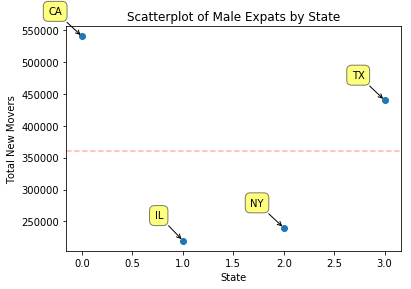

In [30]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(np.arange(len(data)), data)
for label, x, y in zip(labels,np.arange(len(data)), data):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.axhline(data.mean(), linestyle='--', color='red', alpha=0.3)
plt.title("Scatterplot of Male Expats by State")
plt.xlabel("State")
plt.ylabel("Total New Movers")

plt.show()

In [31]:
print("System and module version information: \n")
print('Python version:', sys.version_info)
print('pandas version:', pd.__version__)

System and module version information: 

('Python version:', sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0))
('pandas version:', u'0.19.0')
